# Ramandeep Kaur
# Student ID: 8976849

# 1- Data Tidying:
## **Part I**
### **Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.


#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.

In [153]:

import pandas as pd

# Load the data from a CSV file into a DataFrame

df = pd.read_csv('data/tb-raw.csv')
# Printing the Raw data
print(df.head())

  country  year  m014  m1524  m2534  m3544  m4554  m5564   m65  mu  f014
0      AD  2000   0.0    0.0    1.0    0.0      0      0   0.0 NaN   NaN
1      AE  2000   2.0    4.0    4.0    6.0      5     12  10.0 NaN   3.0
2      AF  2000  52.0  228.0  183.0  149.0    129     94  80.0 NaN  93.0
3      AG  2000   0.0    0.0    0.0    0.0      0      0   1.0 NaN   1.0
4      AL  2000   2.0   19.0   21.0   14.0     24     19  16.0 NaN   3.0


## Converting data 

In [154]:

# 1: Reshape the data
df_tidy = pd.melt(df, id_vars=['country', 'year'], var_name='sex_age', value_name='cases') 


#   2: Split the variable bi sex and age
df_tidy['sex'] = df_tidy['sex_age'].apply(lambda x: x[0])  
df_tidy['age'] = df_tidy['sex_age'].apply(lambda x: x[1:])  

df_tidy.replace('m', 'Man', inplace=True)#   3: Replace the 'm' & 'f' with Man & Women
df_tidy.replace('f', 'Women', inplace=True)


df_tidy['age'] = df_tidy['age'].map({
    '014': '0 to 14',
    '1524': '15 to 24',
    '2534': '25 to 34',  #   4: Map age group to actual age group labels
    '3544': '35 to 44',
    '4554': '45 to 54',
    '5564': '55 to 64',
    '65': '65',
    'u': 'unidentical'
})

df_tidy.drop(columns=['sex_age'], inplace=True) #   5: Remove unnecessary columns 'sex_age'

print(df_tidy)

   country  year  cases    sex      age
0       AD  2000    0.0    Man  0 to 14
1       AE  2000    2.0    Man  0 to 14
2       AF  2000   52.0    Man  0 to 14
3       AG  2000    0.0    Man  0 to 14
4       AL  2000    2.0    Man  0 to 14
..     ...   ...    ...    ...      ...
85      AM  2000    1.0  Women  0 to 14
86      AN  2000    0.0  Women  0 to 14
87      AO  2000  247.0  Women  0 to 14
88      AR  2000  121.0  Women  0 to 14
89      AS  2000    NaN  Women  0 to 14

[90 rows x 5 columns]


### Checking the missing values

In [155]:
missing_values = df_tidy.isnull().sum()
print(missing_values)

country     0
year        0
cases      17
sex         0
age         0
dtype: int64


## Fill null value with 0.

In [156]:
df_tidy = df_tidy.fillna(0)
print(df_tidy)

   country  year  cases    sex      age
0       AD  2000    0.0    Man  0 to 14
1       AE  2000    2.0    Man  0 to 14
2       AF  2000   52.0    Man  0 to 14
3       AG  2000    0.0    Man  0 to 14
4       AL  2000    2.0    Man  0 to 14
..     ...   ...    ...    ...      ...
85      AM  2000    1.0  Women  0 to 14
86      AN  2000    0.0  Women  0 to 14
87      AO  2000  247.0  Women  0 to 14
88      AR  2000  121.0  Women  0 to 14
89      AS  2000    0.0  Women  0 to 14

[90 rows x 5 columns]


## **Part II**

Observe the following dataset: ./CSVs/salesMinimized.csv 
Please observe columns thoroughly as you need to apply some common-sense to represent the columns correctly.

#### Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.


STEP 1. Load Data 

In [157]:
data =  pd.read_csv('data/salesMinimized.csv')
data.describe()
data.head(10)

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,...,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,...,0,0,0,0,20,0,2,13,13,0
8,8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,...,0,4,0,4,0,1,1,3,0,2
9,9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [158]:
data.head(10)

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,...,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,...,0,0,0,0,20,0,2,13,13,0
8,8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,...,0,4,0,4,0,1,1,3,0,2
9,9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Step- 2. Step 4: Rename Columns
If column names are unclear or not representative, rename them.

In [159]:
data.rename(columns={'Unnamed: 0': 'row_id'}, inplace=True)
id_vars = ['row_id', 'id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

#loop for column head change
value_vars = [col for col in data.columns if col not in id_vars] 

data_tidy = pd.melt(data, id_vars=id_vars, value_vars=value_vars, var_name='day', value_name='sales')

print(data_tidy)

        row_id                             id        item_id    dept_id   
0            0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  \
1            1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1   
2            2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1   
3            3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1   
4            4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1   
...        ...                            ...            ...        ...   
139995    1995    FOODS_2_169_CA_1_validation    FOODS_2_169    FOODS_2   
139996    1996    FOODS_2_170_CA_1_validation    FOODS_2_170    FOODS_2   
139997    1997    FOODS_2_171_CA_1_validation    FOODS_2_171    FOODS_2   
139998    1998    FOODS_2_172_CA_1_validation    FOODS_2_172    FOODS_2   
139999    1999    FOODS_2_173_CA_1_validation    FOODS_2_173    FOODS_2   

         cat_id store_id state_id   day  sales  
0       HOBBIES     CA_1       CA   d_1      0  
1

Step 3: Handle Missing Values

In [160]:
missingdata = data_tidy.isnull().sum()
print(missingdata)

row_id      0
id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
day         0
sales       0
dtype: int64


Step 4: Reorganize the DataFrame

In [161]:
# Reorganize columns
# df = df[['column1', 'column2', ...]]


Step 5: Save the Tidied Dataset

In [162]:
# Save the tidied dataset
df.to_csv('tidied_dataset.csv', index=False)

## PART III
Using Boston House pricing dataset, apply outlier detection techniques discussed in class to detect outliers. Use different techniques and comment your code. <br>
You need to check how to load the dataset correctly! <br>
1. You should include some Visualization techniques
2. You should include some statistical approaches
3. You should analyze your attributes using Univariant and multivariant outlier detection techniques.
4. Choose one or more of your outlier detection techniques and remove outliers

In [163]:
# Importing
data_url = "http://lib.stat.cmu.edu/datasets/boston"


In [164]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [165]:
# Data URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Load the dataset into a pandas DataFrame
boston_data = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)

# Let's print the first few rows of the dataset to verify it has been loaded correctly
print(boston_data.head())

# Fill "NaN" with 0.
boston_data = boston_data.fillna(0)
print(boston_data)

          0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8
             0      1      2    3      4      5     6       7    8      9    
0       0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1     396.90000   4.98  24.00  0.0  0.000  0.000   0.0  0.0000  0.0    0.0   
2       0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
3     396.90000   9.14  21.60  0.0  0.000  0.000   0.0  0.0000  0.0    0.0   
4       0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
...         ...    ...    ...  ...    ...    ...   ...     ...  

## Asign column name manualy with array slicing

In [166]:
# empty array
column_m = [] 
for i in range(0, len(boston_data), 2):
    merged_row = pd.concat([boston_data.iloc[i], boston_data.iloc[i+1]], ignore_index=True)
    column_m.append(merged_row)

merged_data = pd.DataFrame(column_m) 

# slicing array

merged_data = merged_data.iloc[:, :14] 

merged_data.columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
] 
print(merged_data) # view

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

### Visualization of data 

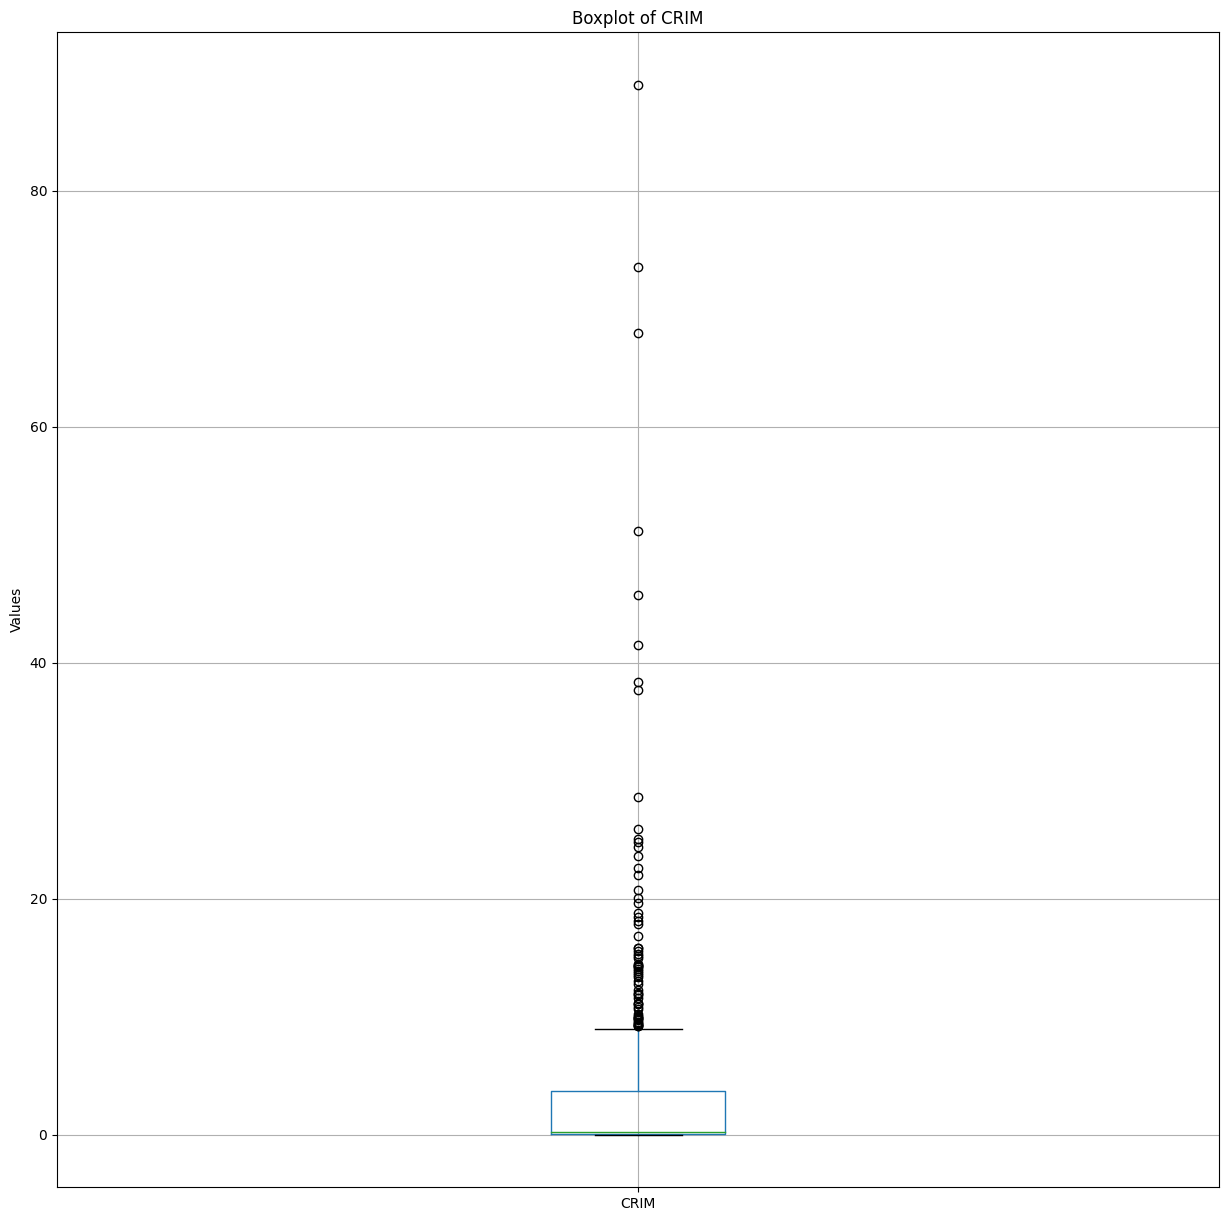

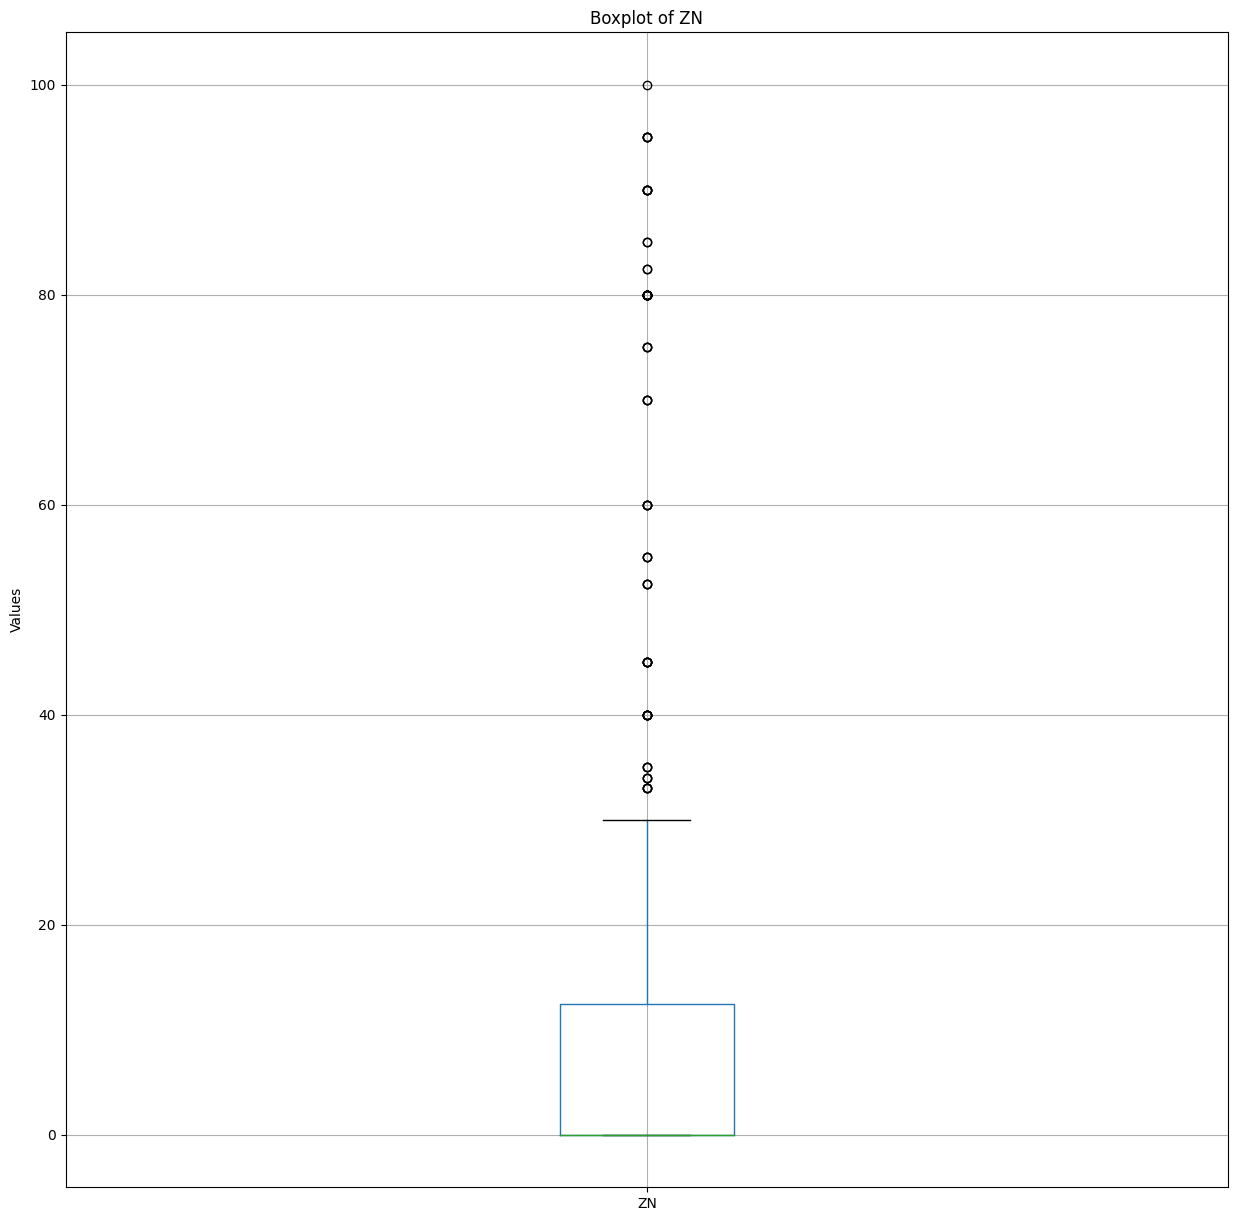

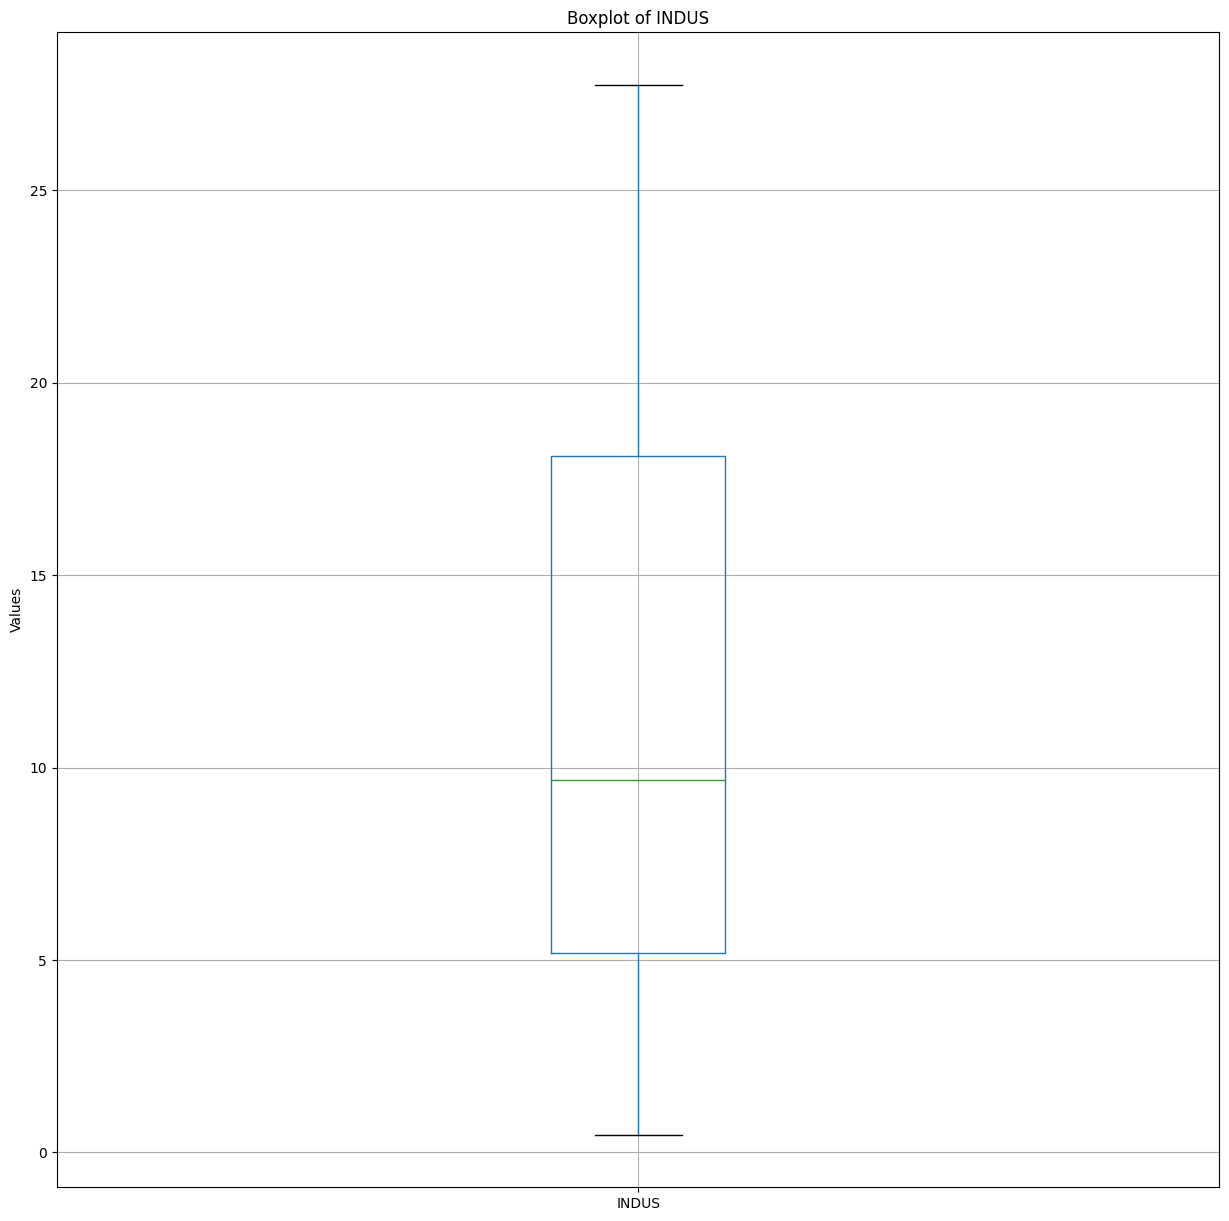

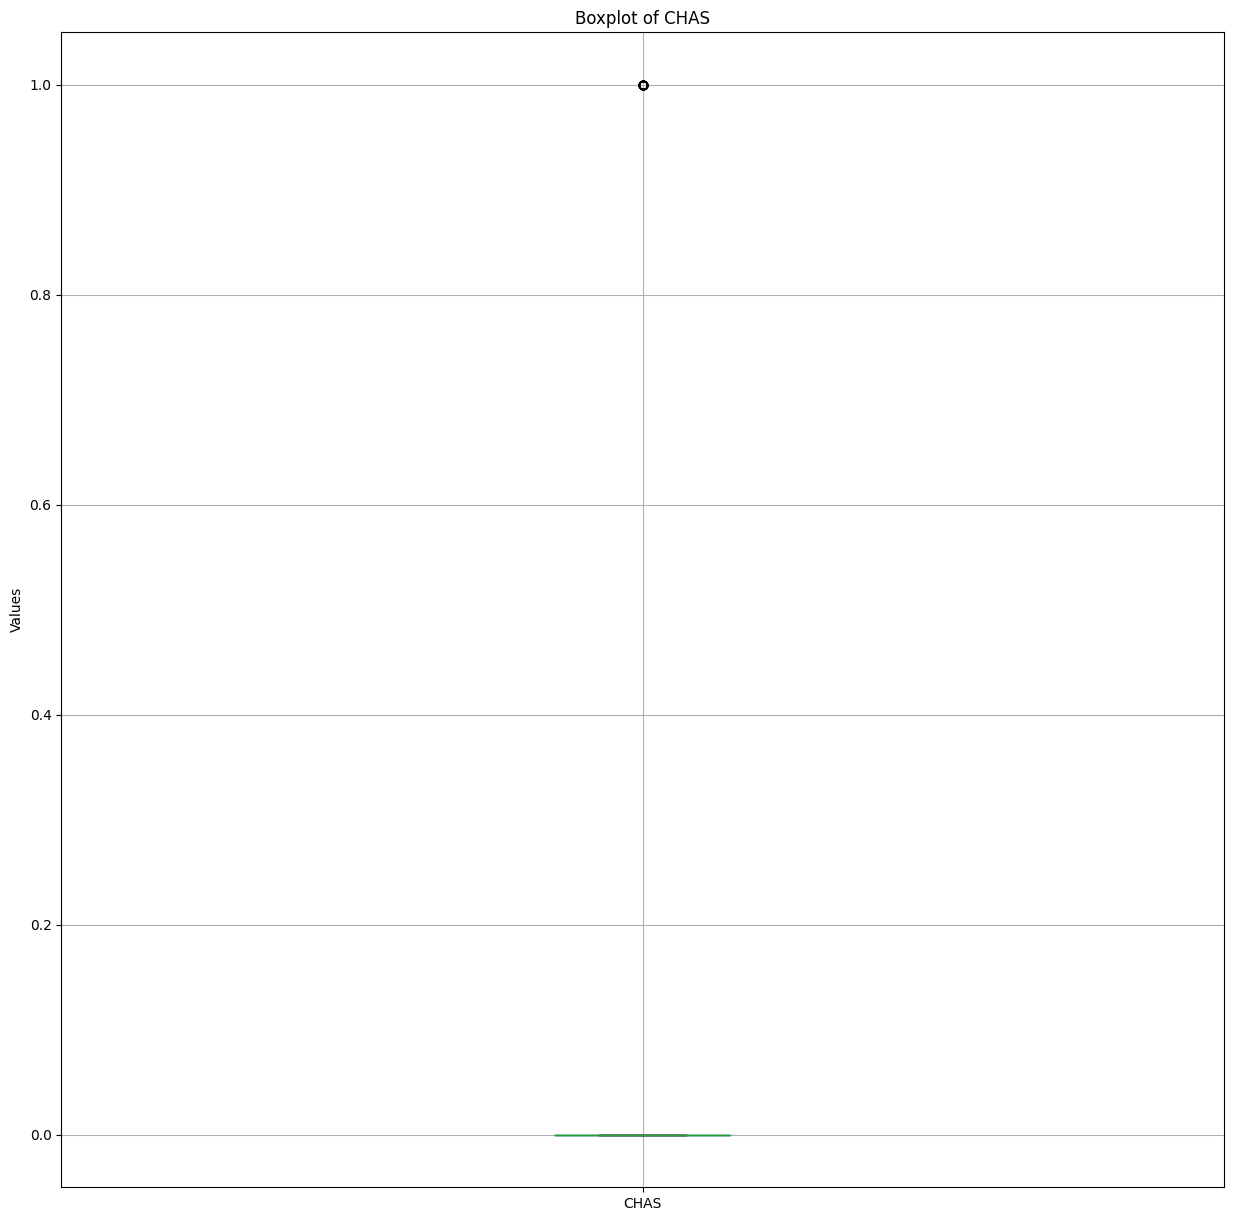

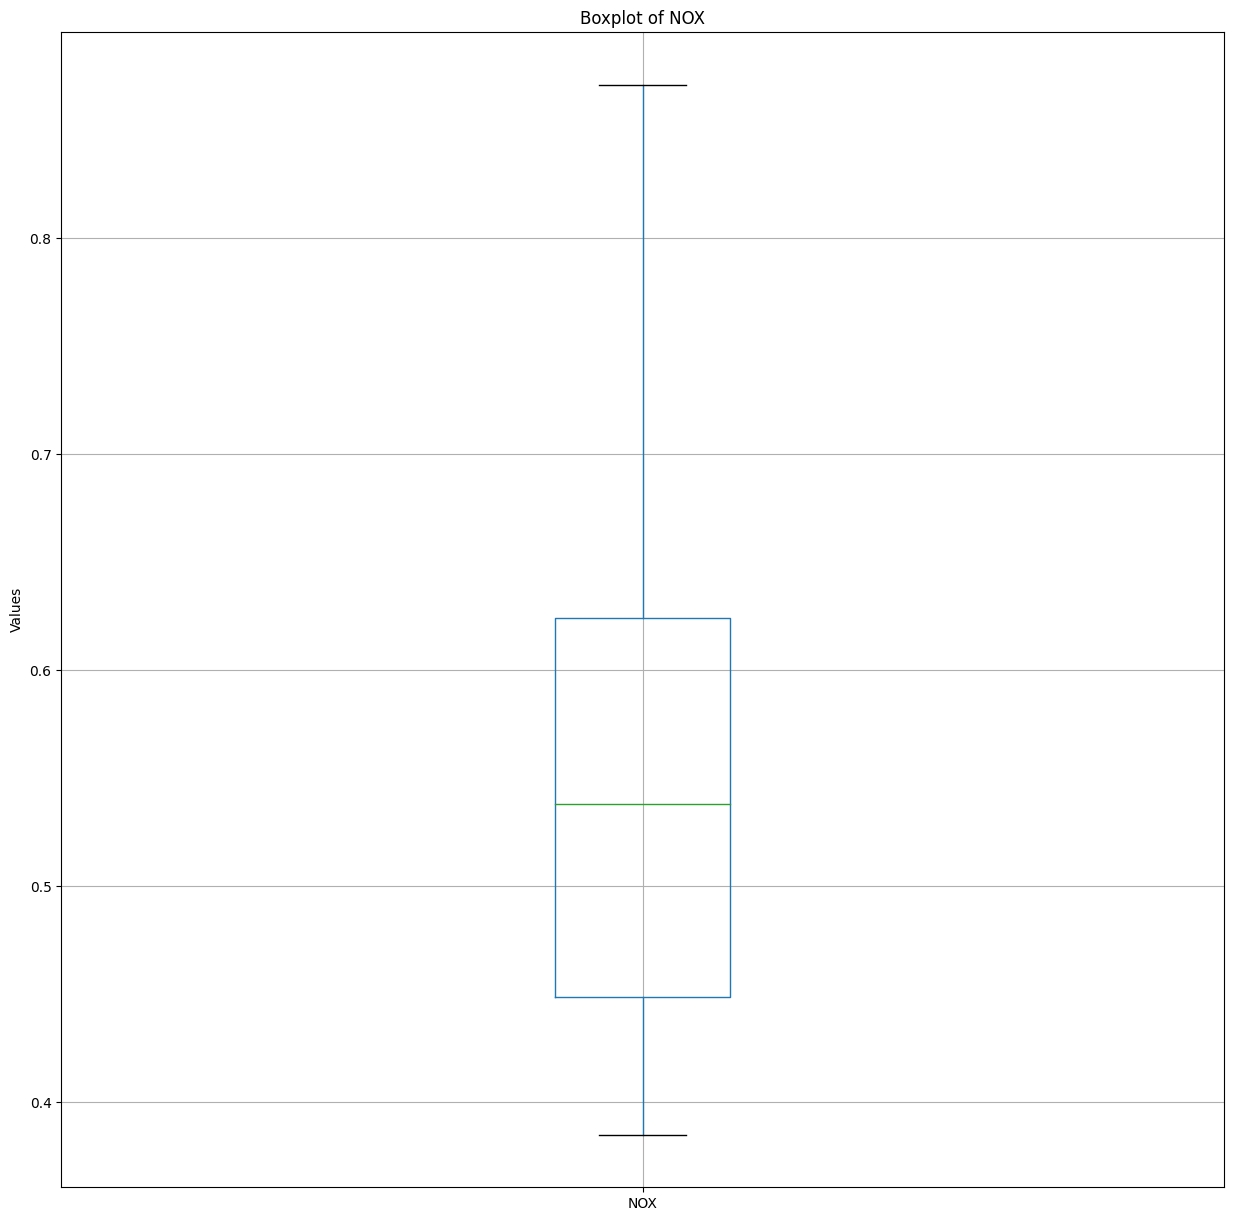

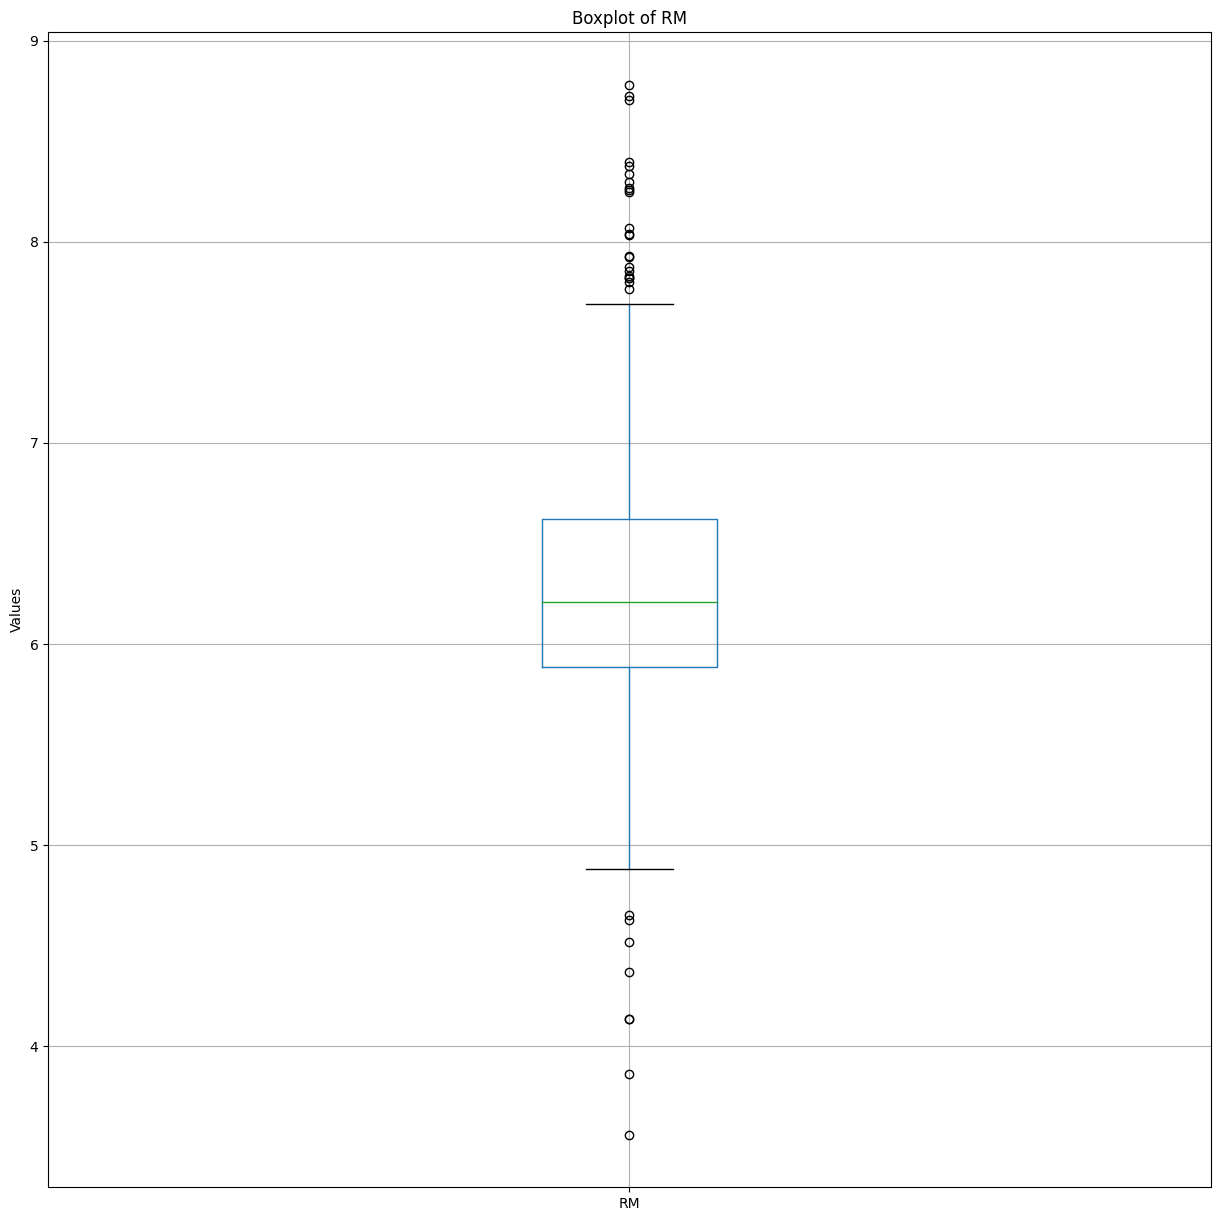

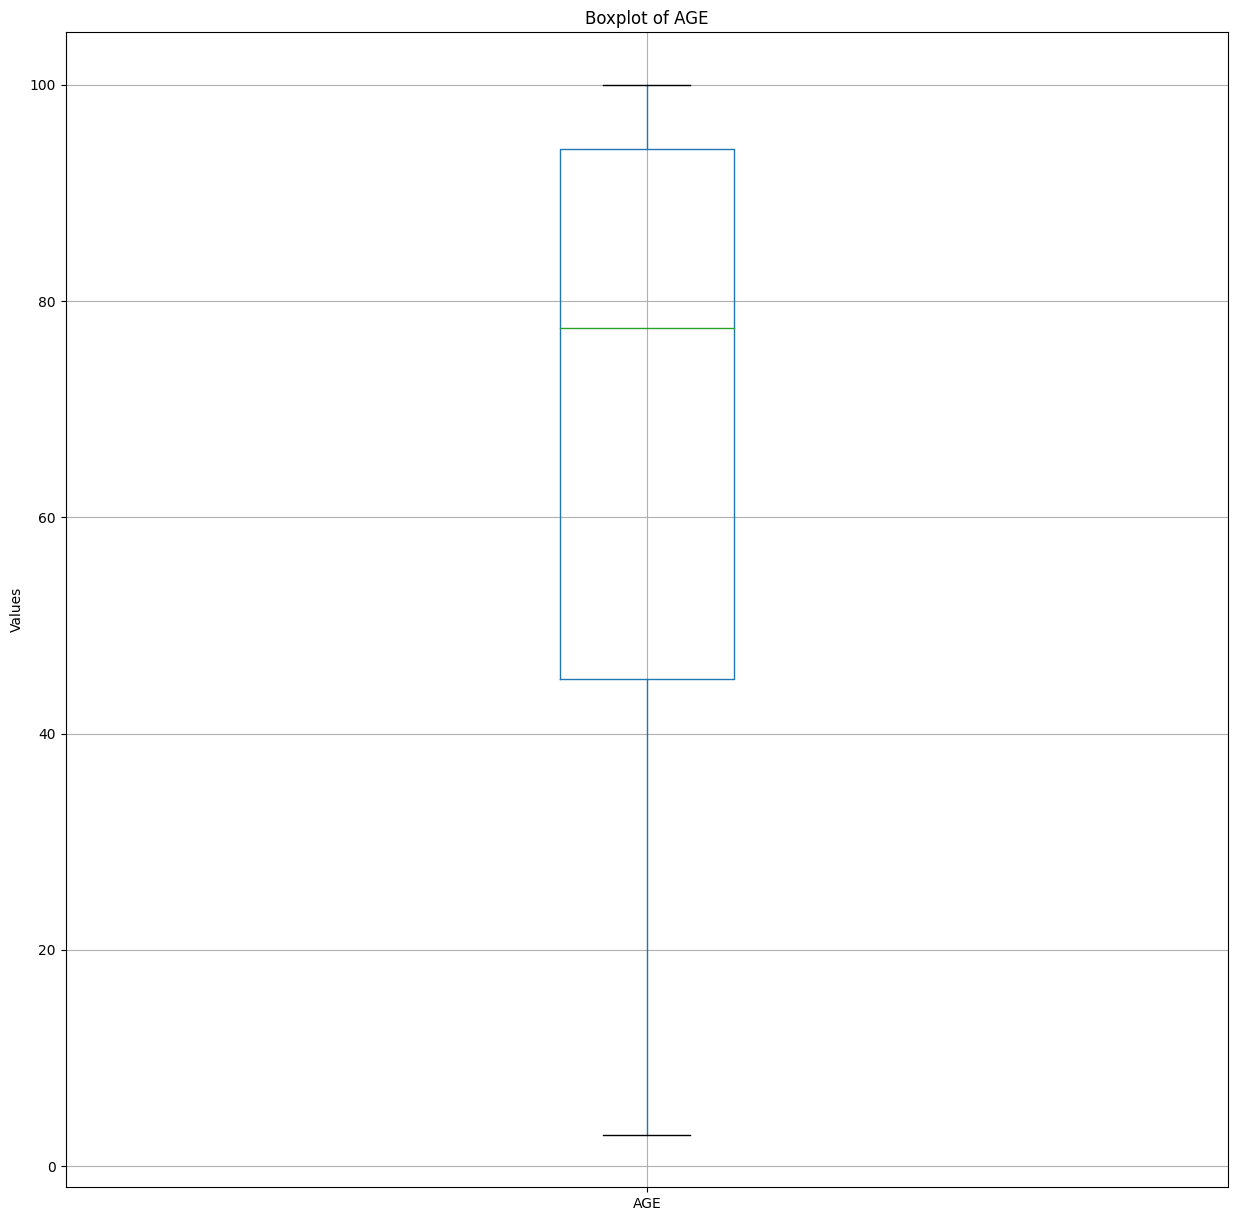

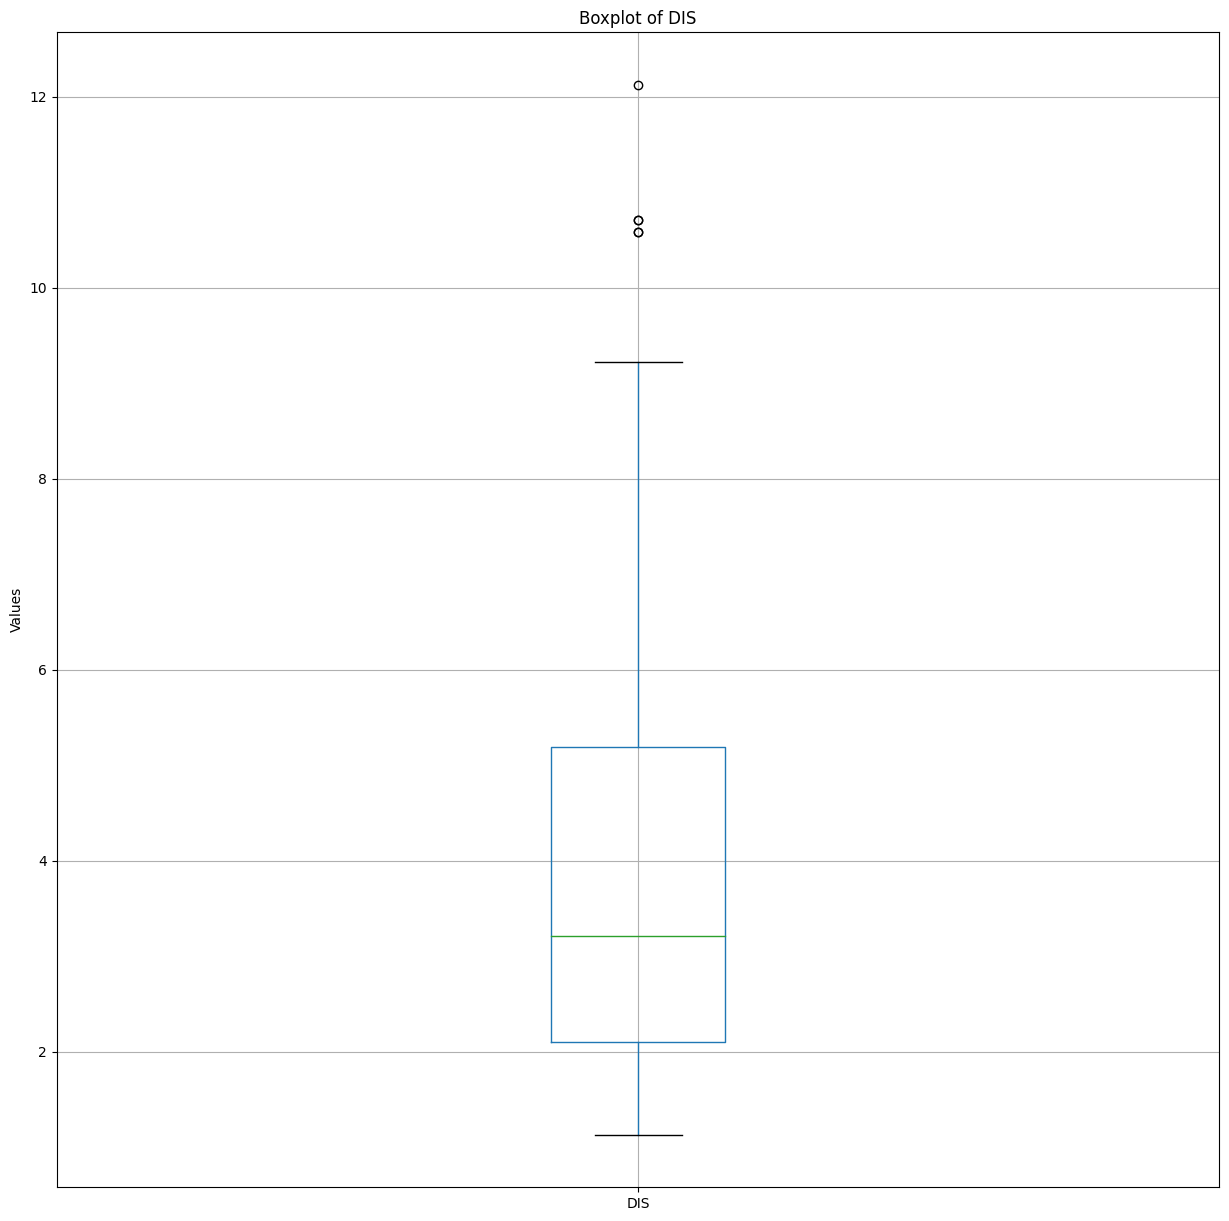

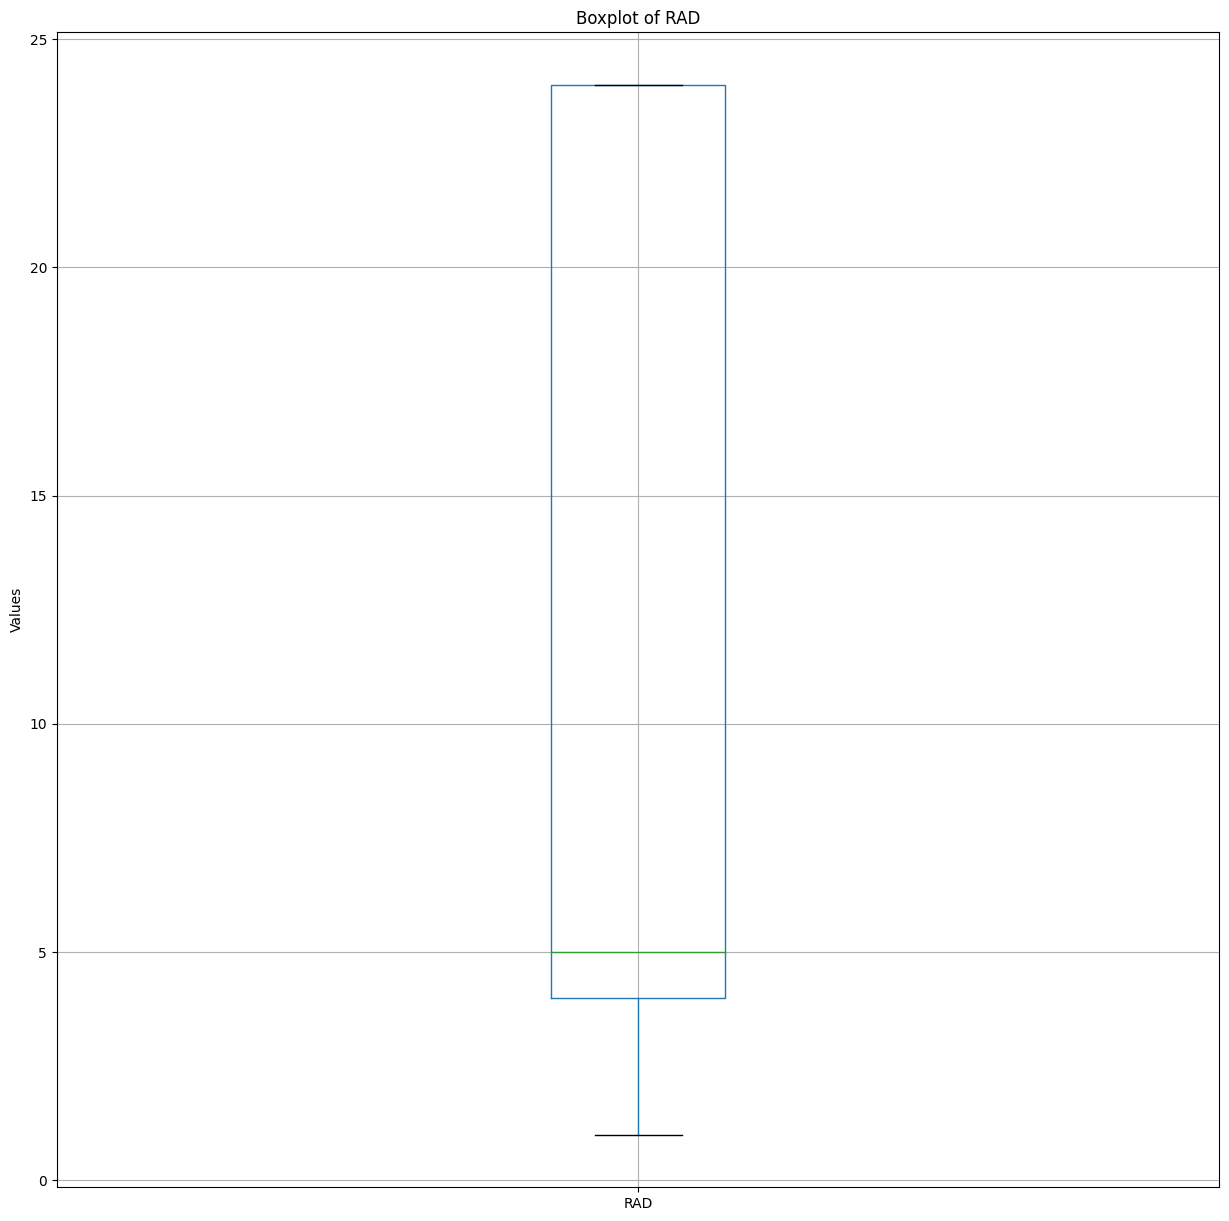

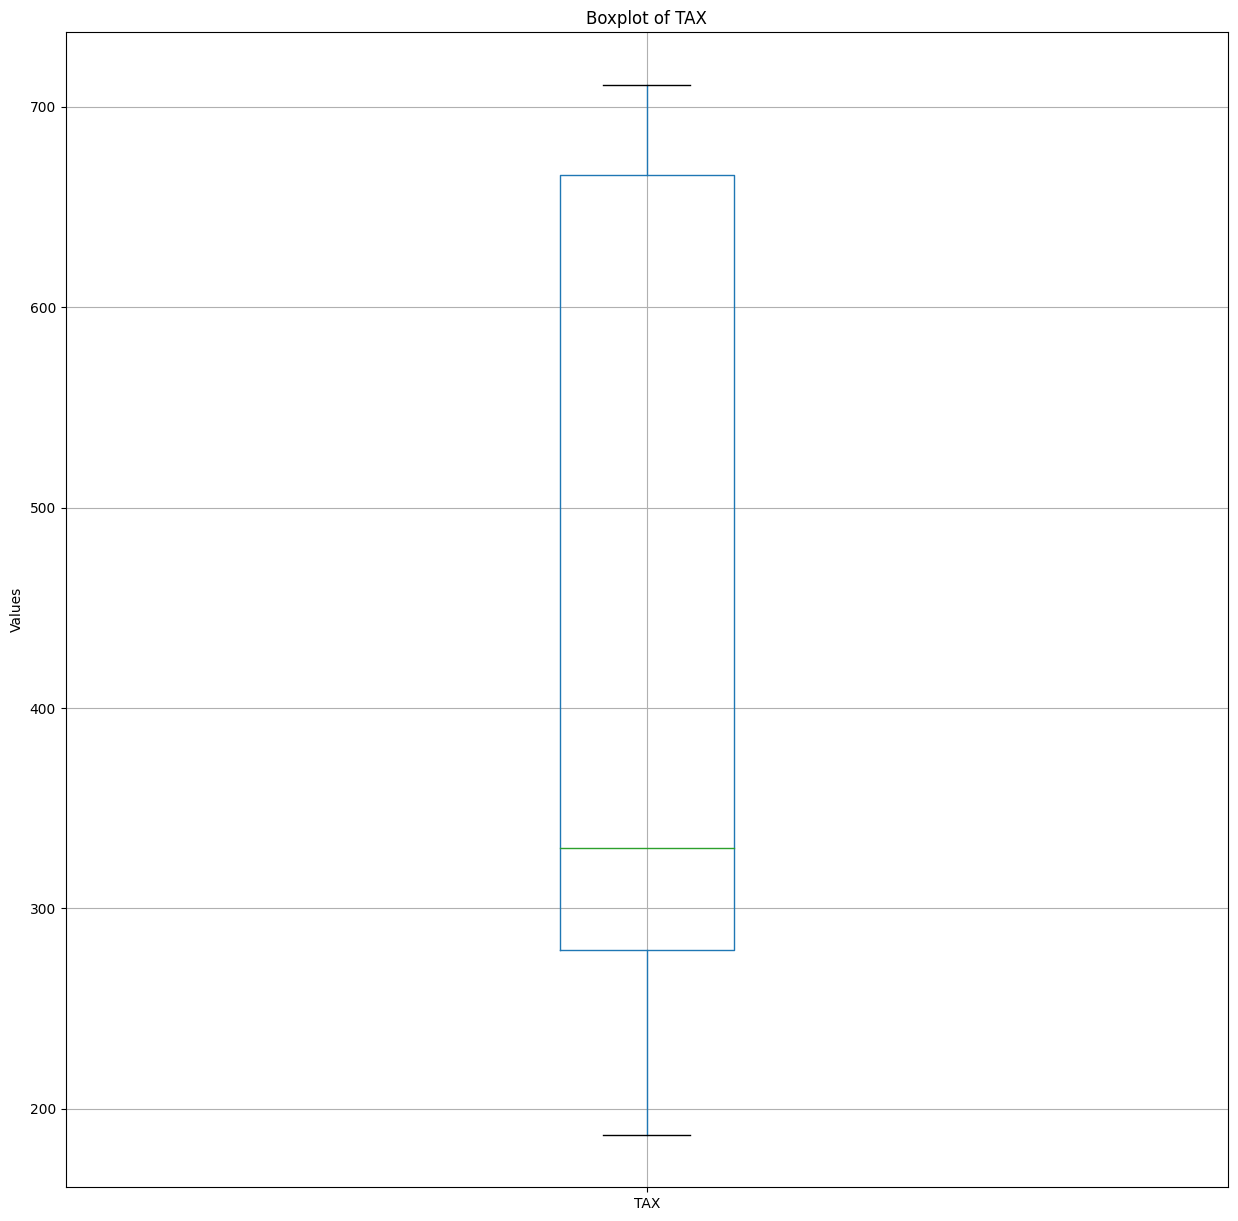

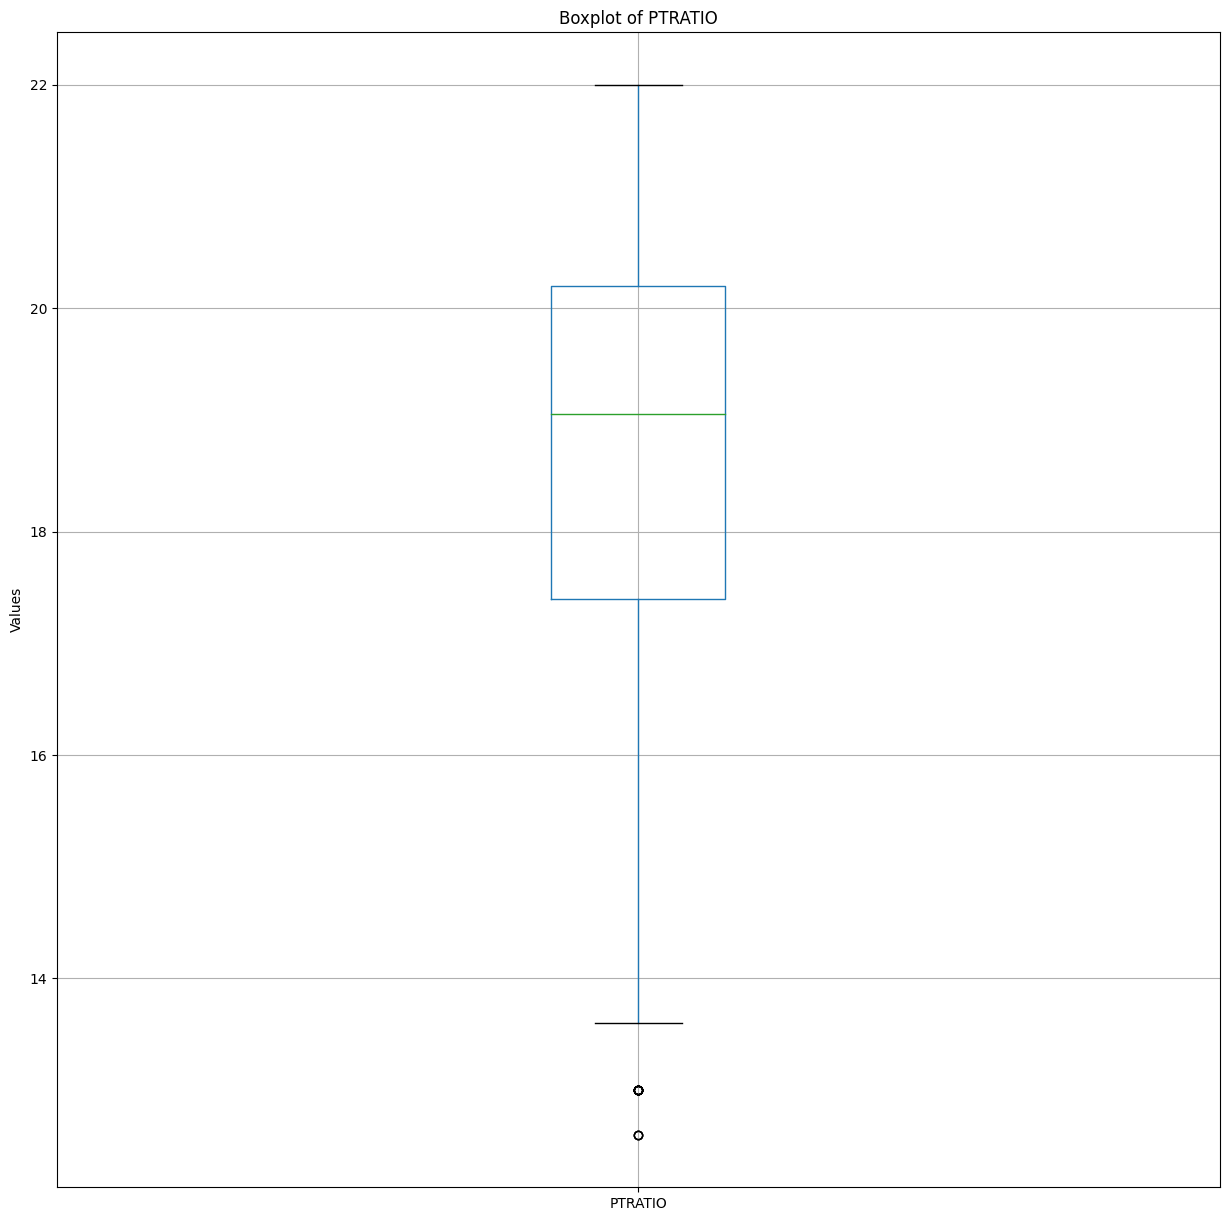

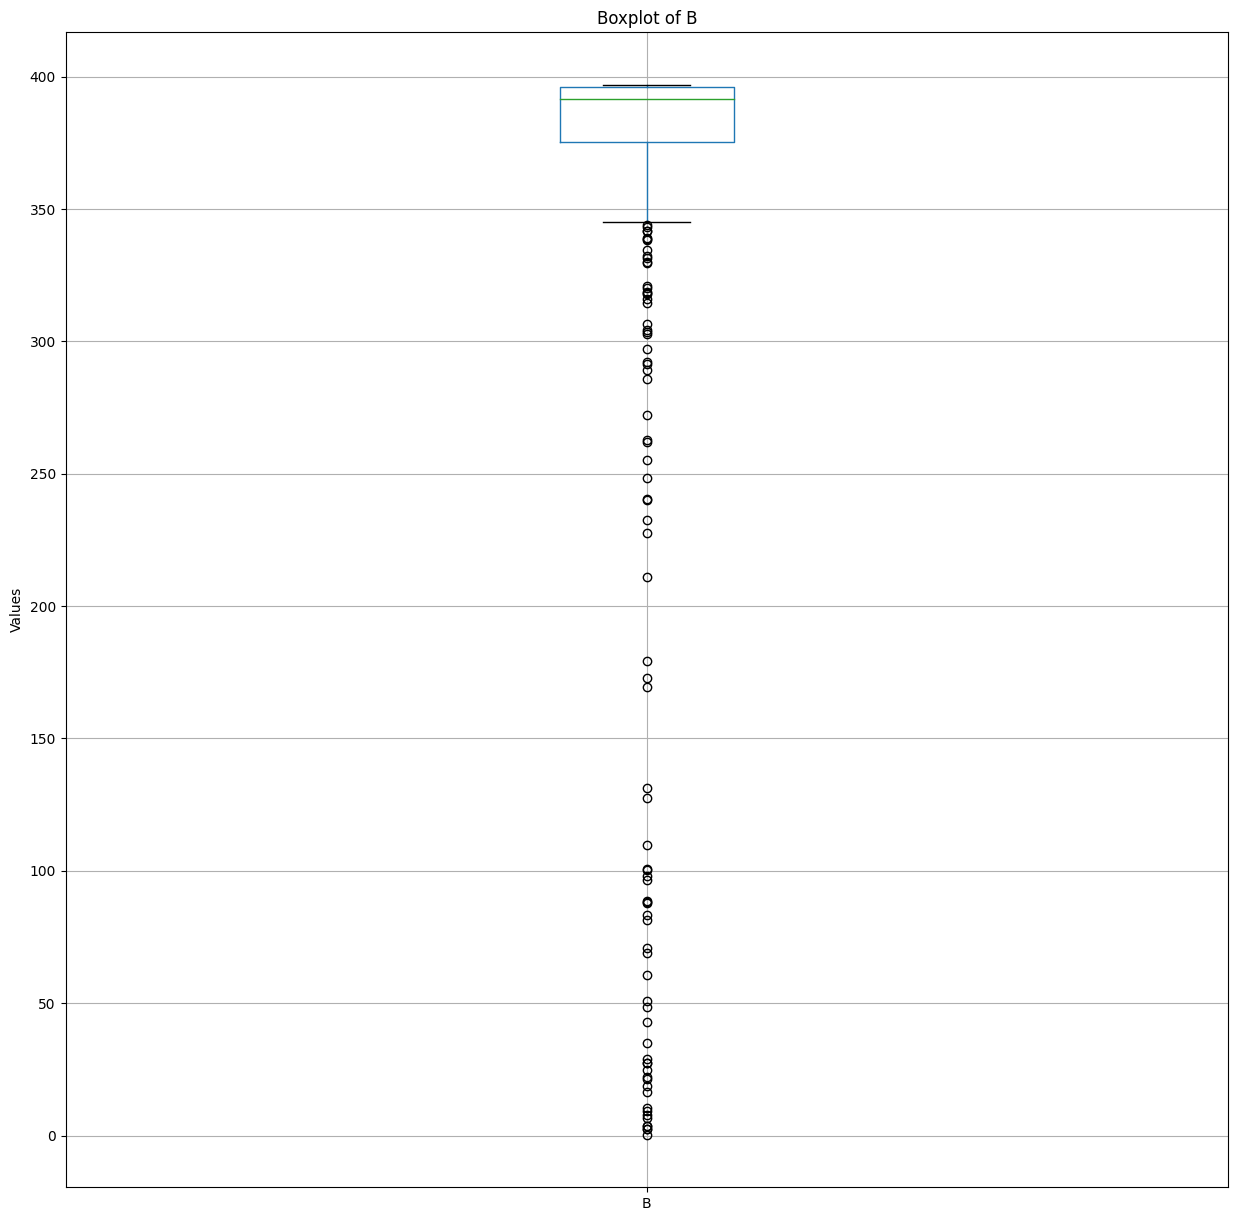

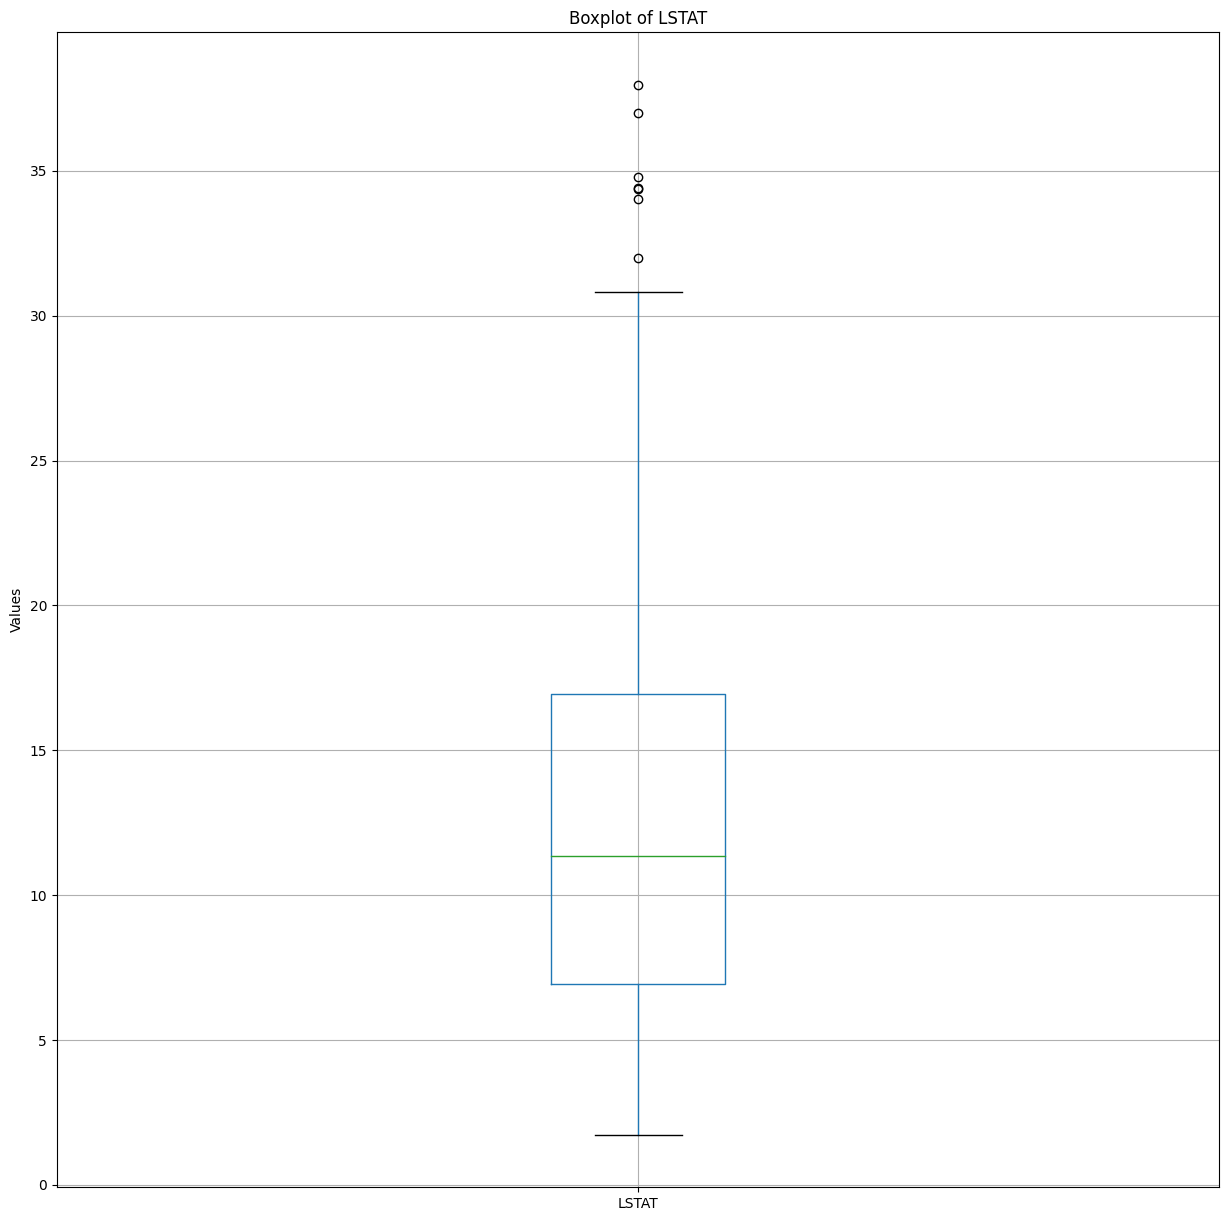

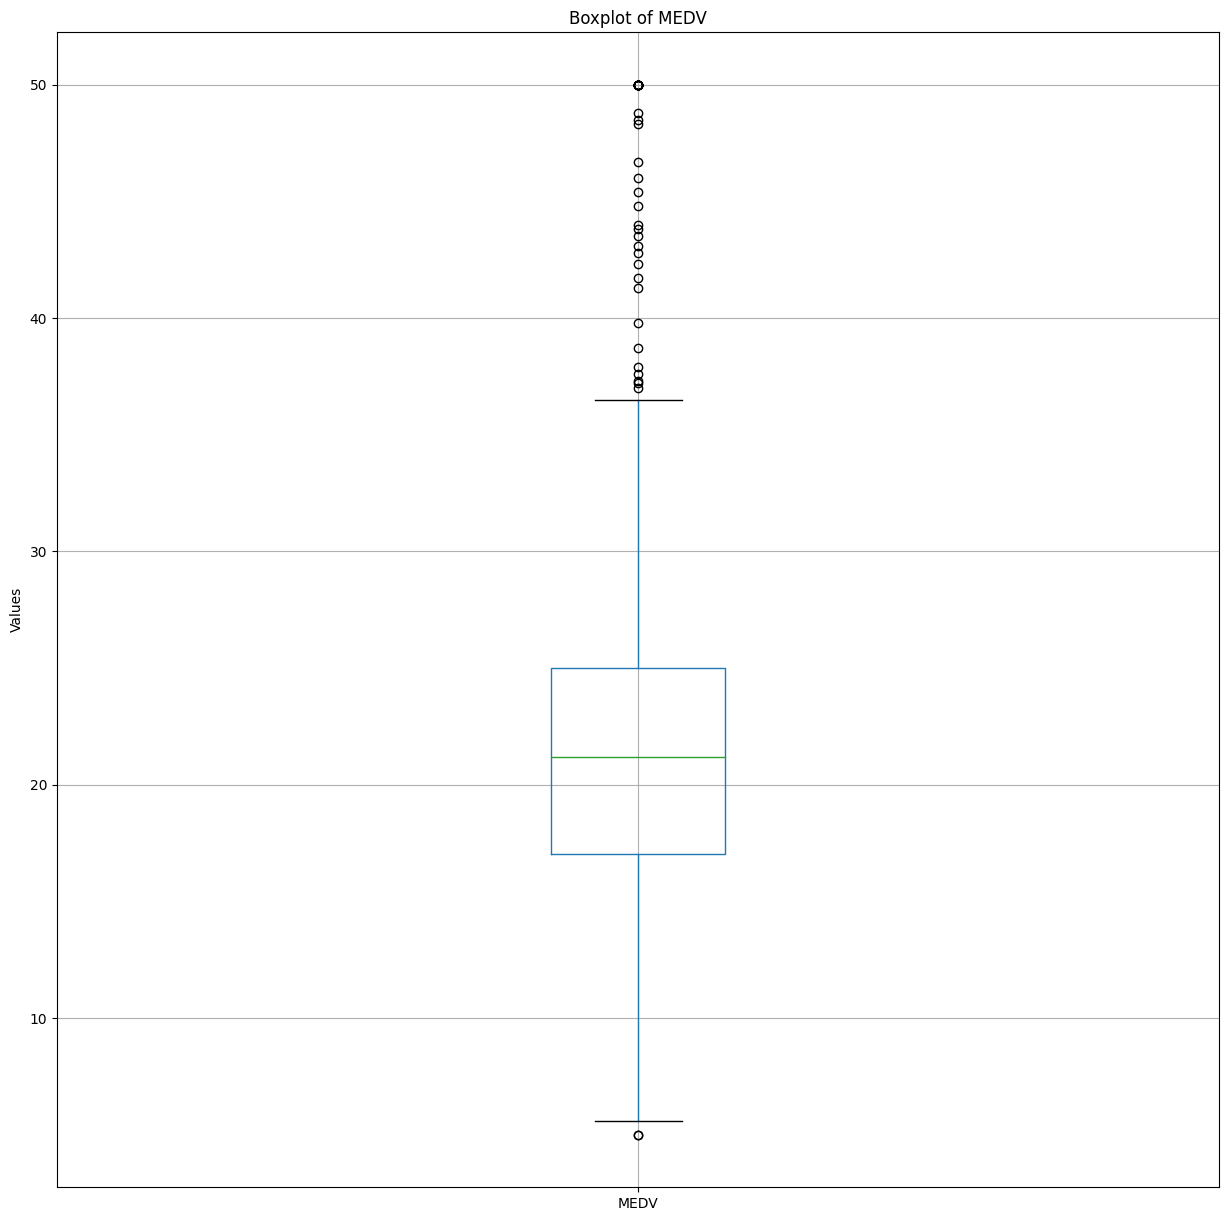

In [167]:
for column in merged_data:

    #  Setting  the figure size
    plt.figure(figsize=(15, 15)) 
    merged_data.boxplot([column])
# show title
    plt.title('Boxplot of ' + column)  
    plt.ylabel('Values')  
    plt.show()  